
># **<span style="color:#ef233c">Time Domain Analysis</span>**
>- ***<span style="color:#13315c"> Gokul Agrawal | CL24M004<span>*** 
>- ***<span style="color:#13315c"> Shreenandan Sahu | CL24M013<span>***
>- ***<span style="color:#13315c"> K S Suraksha Jain | CL24M015<span>***


 **<span style="color:teal">Defination**: A time series is a series of data points recorded at different time-intervals. The time series analysis means analyzing the time series data using various statistical tools and techniques.

*<span style="color:#9e0059">In This notebook we will focus on doing the Time Domain Analysis which is simply the statistical analysis. We have tried to do the following analysis.*


- **<span style="color:#e09f3e">Mean**: Measures the average value over time.
- **<span style="color:#e09f3e">Median**: The central value when data points are ordered, useful for skewed distributions.
- **<span style="color:#e09f3e">Variance**: Measures the spread of data around the mean.
- **<span style="color:#e09f3e">Standard Deviation**: Square root of variance, showing the average deviation from the mean.
- **<span style="color:#e09f3e">Range**: Difference between the maximum and minimum values.
- **<span style="color:#e09f3e">Skewness**: Measures the asymmetry of the data distribution.
- **<span style="color:#e09f3e">Kurtosis**: Measures the "tailedness" or peakedness of the data distribution.
- **<span style="color:#e09f3e">Percentiles and Quartiles**: Helps in understanding the distribution and identifying outliers.
- **<span style="color:#e09f3e">Maximum and Minimum Values**: Identifies the highest and lowest data points.

*<span style="color:#9e0059">In this notebook we have tried analysing the data using python inbuilt functions and we have also developed our own code to compute the same statistical parameter and compared them. Every block of code has an explanation markdown.*



> ### **<span style="color:#ff0054">ABOUT DATA SET**
We have used FNIRS data recorded for ***<span style="Color:#e09f3e">Frontotemporal activation differs between perception of simulated cochlear implant speech and speech in background noise: An image-based fNIRS study*** available at https://data.mendeley.com/datasets/4cjgvyg5p2/1 for the paper https://pmc.ncbi.nlm.nih.gov/articles/PMC8503862/#ABS1 .

Sampled at a ***Sampling Rate of 25 Hz*** the database has collection of data from 28 channels covering the frontotemporal region of the head. The data was recorded for around ***35 minutes***.

For the analysis purpose we have choosen the CH7.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#umber of datapoints of the given data used
row_num=10000 

#choosing the desired columns from the 29 columns 28 channels and 1 time column
#loading the data to dataframe of pandas
df=pd.read_csv("DataSet.csv",usecols=["Time","CH7"],nrows=row_num)

#coverting the dataframe to 2D array in python to ease working on it. 
data_main=df.to_numpy()

#print(data_main[:,0]) : is used to represent all values
#print(data_main[0][0]) row,column configuration.


#### <span style="color:#ff0054"> **Ploting The Raw Data**

Using the matplotlib library we will plot the graph of the raw data

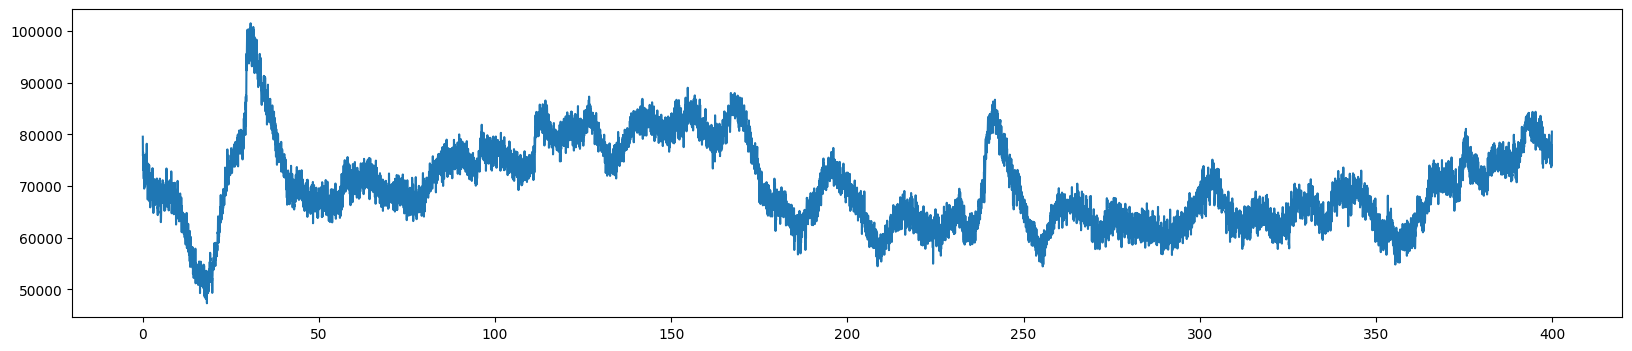

In [2]:
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1])
plt.show()

#### <span style="color:#ff0054"> **Moving Average Filtering**

We will filter the high frequency noise component using moving average filter averaging over n samples. The following code is a function for moving average filter.

In [3]:
def moving_average(data, window):
    num_row = data.size  # Get the total number of elements
    flt_data = np.full(num_row,data.mean())  # Initialize the output array with mean value of data

    for j in range(window - 1, num_row):
        k = j - (window - 1)
        flt_data[j] = data[k:j + 1].sum() / window  # Calculate the moving average
    
    return flt_data


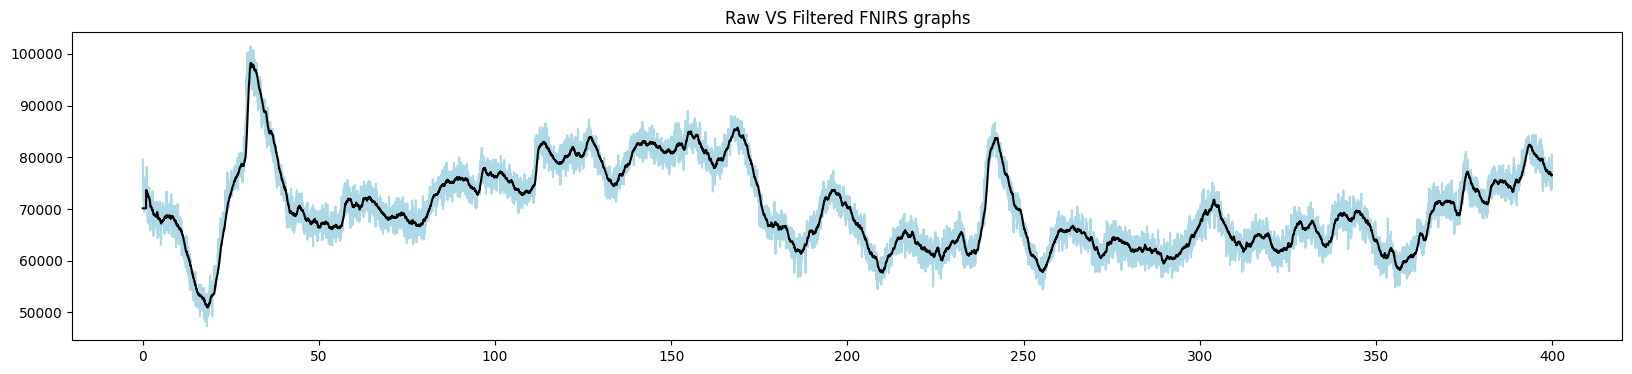

In [4]:
filtered_data=moving_average(data_main[:,1],25)
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1], color='lightblue')
plt.plot(data_main[:,0],filtered_data, color='black')
plt.title("Raw VS Filtered FNIRS graphs")
plt.show()

In [5]:
avg=data1.sum()/row_num
variance=data1.var()
print(np.average(data1))
print(np.var(data1))
print(np.std(data1))
print(variance)
print(avg)

NameError: name 'data1' is not defined

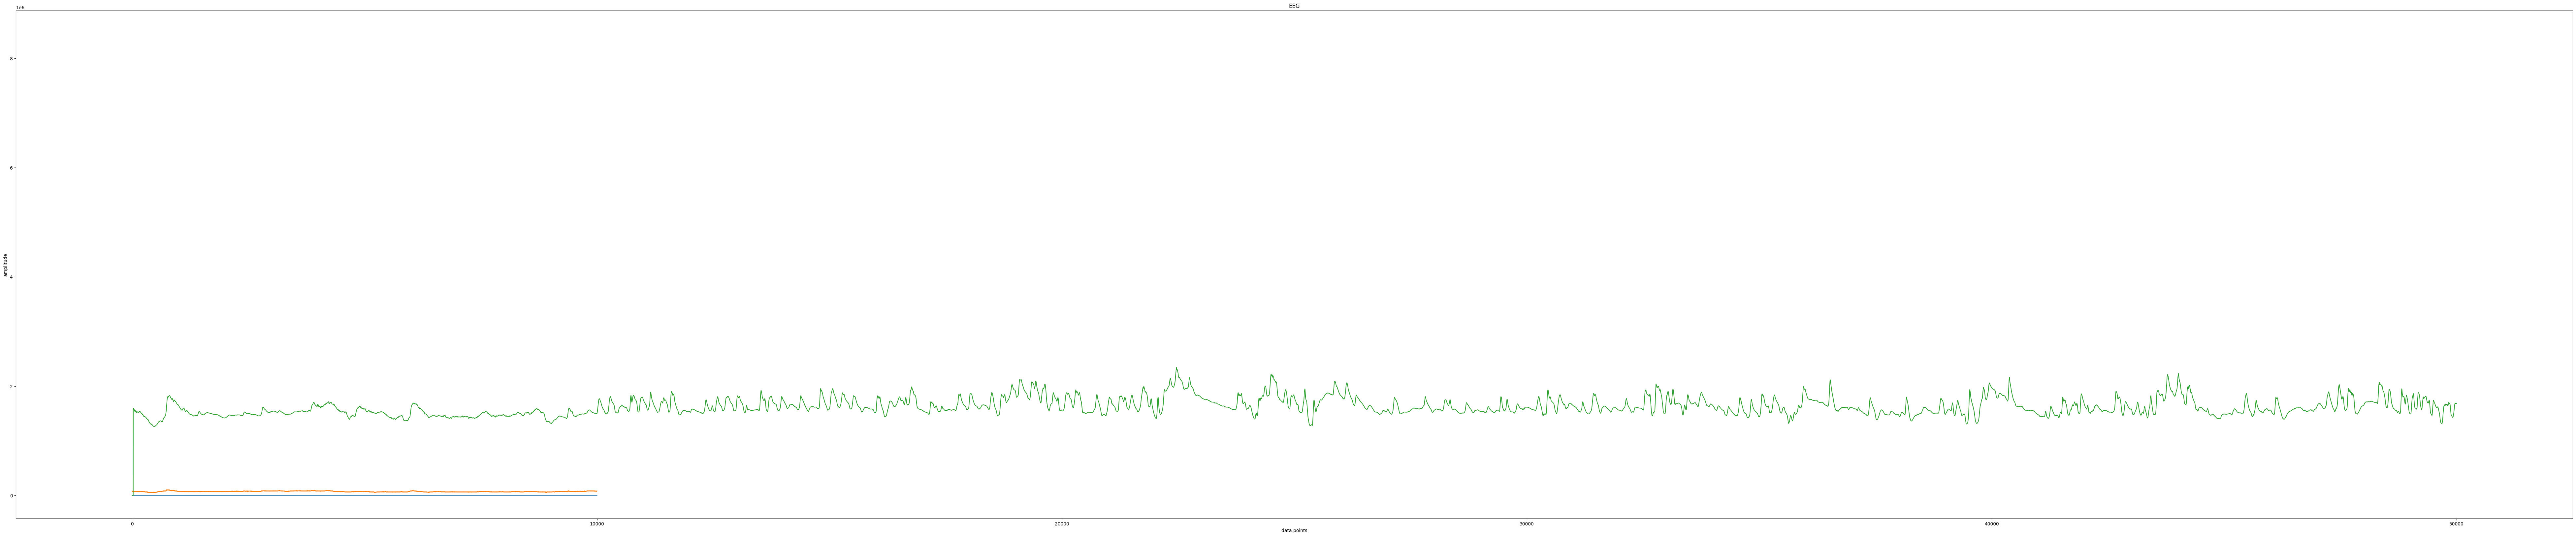

In [ ]:
#ploting the daa in the graphial form

plt.figure(figsize=(100, 20))
plt.plot(df)
plt.plot(flt_data)
plt.plot(avg)

plt.xlabel('data points')
plt.ylabel('amplitude')
plt.title('EEG')

plt.show()

In [ ]:
# finding ou the mean of the EEG
mean=df.sum()
mean=mean/30000
print("The mean value of EEG is: ")
print(mean)

# direct formula

print(df.mean())


The mean value of EEG is: 
Time       66.660000
CH7     23380.550176
dtype: float64
Time      199.980000
CH7     70141.650528
dtype: float64


In [ ]:
#finding out the variance own code

colum=df.iloc[:,0]
variance=0

for i in colum:
    variance=variance + ((i-mean)**2)

variance=variance/3000

print("The variance of the dataset is: ")
print(variance)

#direct formula
print(df.var())

The variance of the dataset is: 
Time    1.036919e+05
CH7     1.791174e+09
dtype: float64
Time    1.333467e+04
CH7     6.508433e+07
dtype: float64
